In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [142]:
acoes = ['MGLU3.SA', 'PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
# , 'ELET3.SA', 'LREN3.SA', 'ABEV3.SA', 'BBAS3.SA', 'SUZB3.SA', 'BBDC4.SA'
carteira = pd.DataFrame()       
for i in acoes:
    carteira[i] = yf.download(i, period='11y')['Adj Close']

carteira = carteira.drop(index = carteira[carteira.index.year >= 2022].index)
carteira = carteira.drop(index = carteira[carteira.index.year <= 2012].index)

carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MGLU3.SA,PETR4.SA,VALE3.SA,ITUB4.SA
Date,,,,
2013-01-02,0.362282,7.143482,24.720066,10.152317
2013-01-03,0.377225,7.401068,24.299656,10.455584
2013-01-04,0.374970,7.411950,23.924093,10.393754
2013-01-07,0.366229,7.284973,23.453234,10.217088
2013-01-08,0.363692,7.074549,23.268250,10.258307
...,...,...,...,...
2021-12-23,6.200000,14.814442,70.666153,20.190018
2021-12-27,6.780000,15.034071,70.487587,20.398163
2021-12-28,6.830000,15.049759,68.791252,20.322477


<Axes: xlabel='Date'>

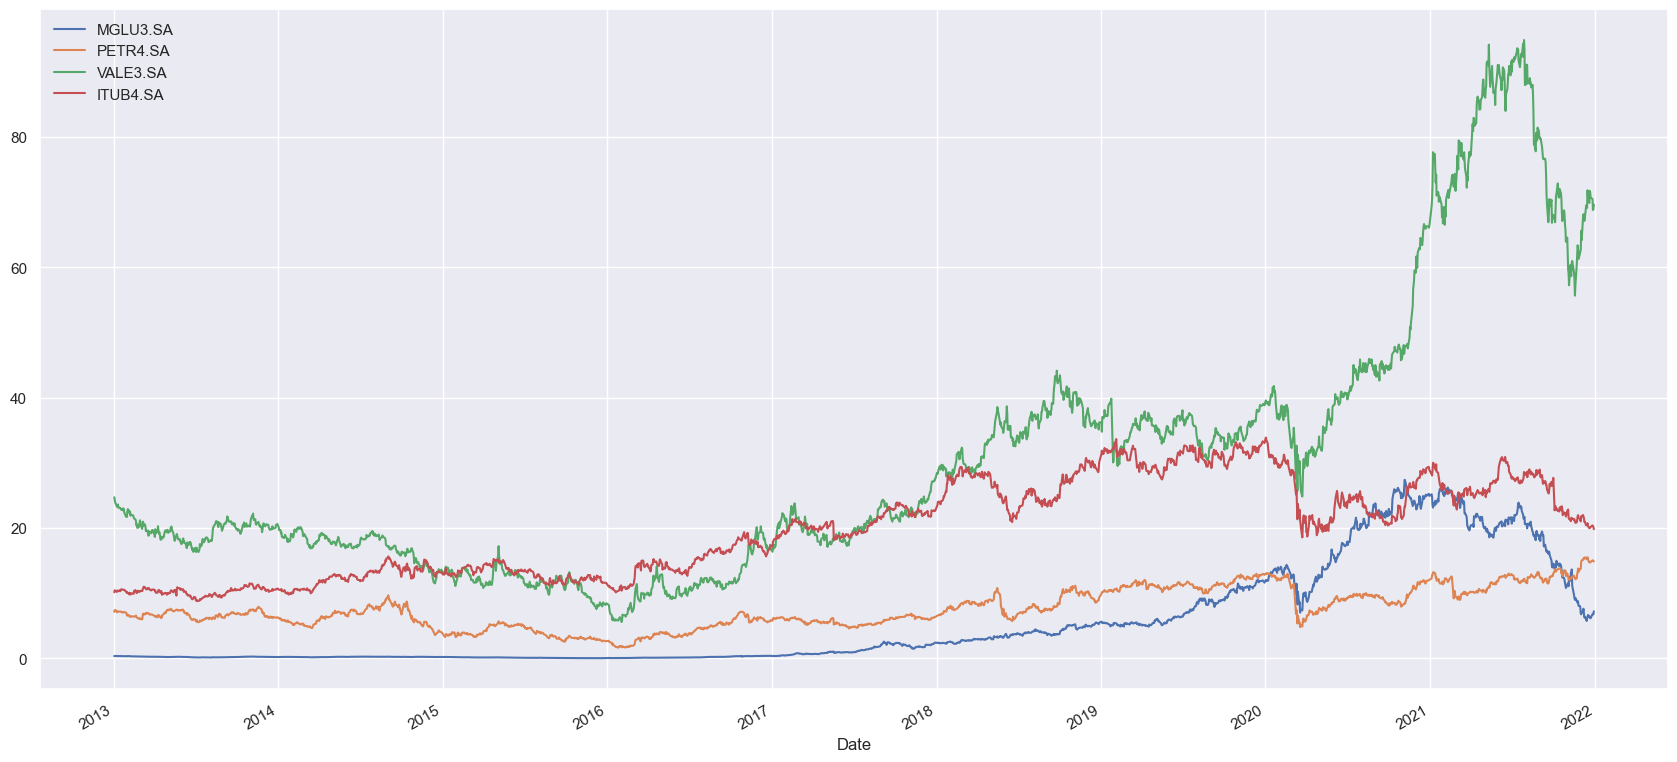

In [143]:
sns.set()
carteira.plot(figsize=(21,10))

In [144]:
# Transformando o retorno da carteira em retorno Anual
retorno = carteira.pct_change()
display(retorno)
retorno_anual = retorno.mean() * 252
retorno_anual

,MGLU3.SA,PETR4.SA,VALE3.SA,ITUB4.SA
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.041246,0.036059,-0.017007,0.029872
2013-01-04,-0.005979,0.001470,-0.015455,-0.005914
2013-01-07,-0.023310,-0.017131,-0.019681,-0.016997
2013-01-08,-0.006927,-0.028885,-0.007887,0.004034
...,...,...,...,...
2021-12-23,0.006494,0.006037,-0.009635,0.005181
2021-12-27,0.093548,0.014825,-0.002527,0.010309
2021-12-28,0.007375,0.001043,-0.024066,-0.003710


MGLU3.SA    0.525369
PETR4.SA    0.213884
VALE3.SA    0.218360
ITUB4.SA    0.130801
dtype: float64

In [145]:
# Caluclando Covariancia das carteiras
cov = retorno.cov() * 264
cov

,MGLU3.SA,PETR4.SA,VALE3.SA,ITUB4.SA
MGLU3.SA,0.402620,0.096385,0.072236,0.063276
PETR4.SA,0.096385,0.271199,0.113400,0.104574
VALE3.SA,0.072236,0.113400,0.212511,0.055122
ITUB4.SA,0.063276,0.104574,0.055122,0.115584


In [146]:
# Calculando correlação das carteiras
corr = retorno.corr()
corr

,MGLU3.SA,PETR4.SA,VALE3.SA,ITUB4.SA
MGLU3.SA,1.000000,0.291688,0.246953,0.293319
PETR4.SA,0.291688,1.000000,0.472367,0.590650
VALE3.SA,0.246953,0.472367,1.000000,0.351710
ITUB4.SA,0.293319,0.590650,0.351710,1.000000


In [147]:
num_acoes = len(acoes)
num_carteiras = 10000

lst_retorno = []
lst_volatilidade = []
lst_peso = []
lst_sharpe_ratio = []

In [148]:
# Exemplo pegando um peso aleatório baseado na quantidade de ativos
peso = np.random.random(num_acoes)
peso /= np.sum(peso)
peso

array([0.06341868, 0.41814513, 0.48260176, 0.03583444])

In [149]:
# Exemplo de calculo da volatilidade
volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
volatilidade

0.39913615971671956

In [150]:
# Exemplo de cálculo do retorno esperado
retorno_esperado = np.dot(peso, retorno_anual)
retorno_esperado

0.23282105999726777

In [151]:
# Exemplo de cálculo do Sharpe
sharpe_ratio = retorno_esperado / volatilidade
sharpe_ratio

0.5833123718044207

In [152]:
for carteira in range(num_carteiras):
    # Calculando o peso
    peso = np.random.random(num_acoes)
    peso /= np.sum(peso)
    lst_peso.append(peso)
    
    # Calculando a volatilidade
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    lst_volatilidade.append(volatilidade)
    
    #Calculando o retorno
    retorno_esperado = np.dot(peso, retorno_anual)
    lst_retorno.append(retorno_esperado)
    
    # Calculando Sharpe Ratio
    sharpe_ratio = retorno_esperado / volatilidade
    lst_sharpe_ratio.append(sharpe_ratio)

In [153]:
dict_carteiras = {'Retorno': lst_retorno, 
                  'Volatilidade': lst_volatilidade, 
                  'sharpe_ratio': lst_sharpe_ratio}

portfolios = pd.DataFrame(dict_carteiras)
portfolios

,Retorno,Volatilidade,sharpe_ratio
0,0.183790,0.348136,0.527927
1,0.281999,0.373818,0.754376
2,0.276479,0.361952,0.763855
3,0.282929,0.367165,0.770576
4,0.301028,0.374843,0.803078
...,...,...,...
9995,0.297320,0.376066,0.790606
9996,0.265514,0.360894,0.735711
9997,0.318297,0.402220,0.791350
9998,0.245782,0.420512,0.584483


C:\Users\Carlos Eduardo\AppData\Local\Temp\ipykernel_7808\3181161429.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
C:\Users\Carlos Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Volatilidade', ylabel='Retorno'>

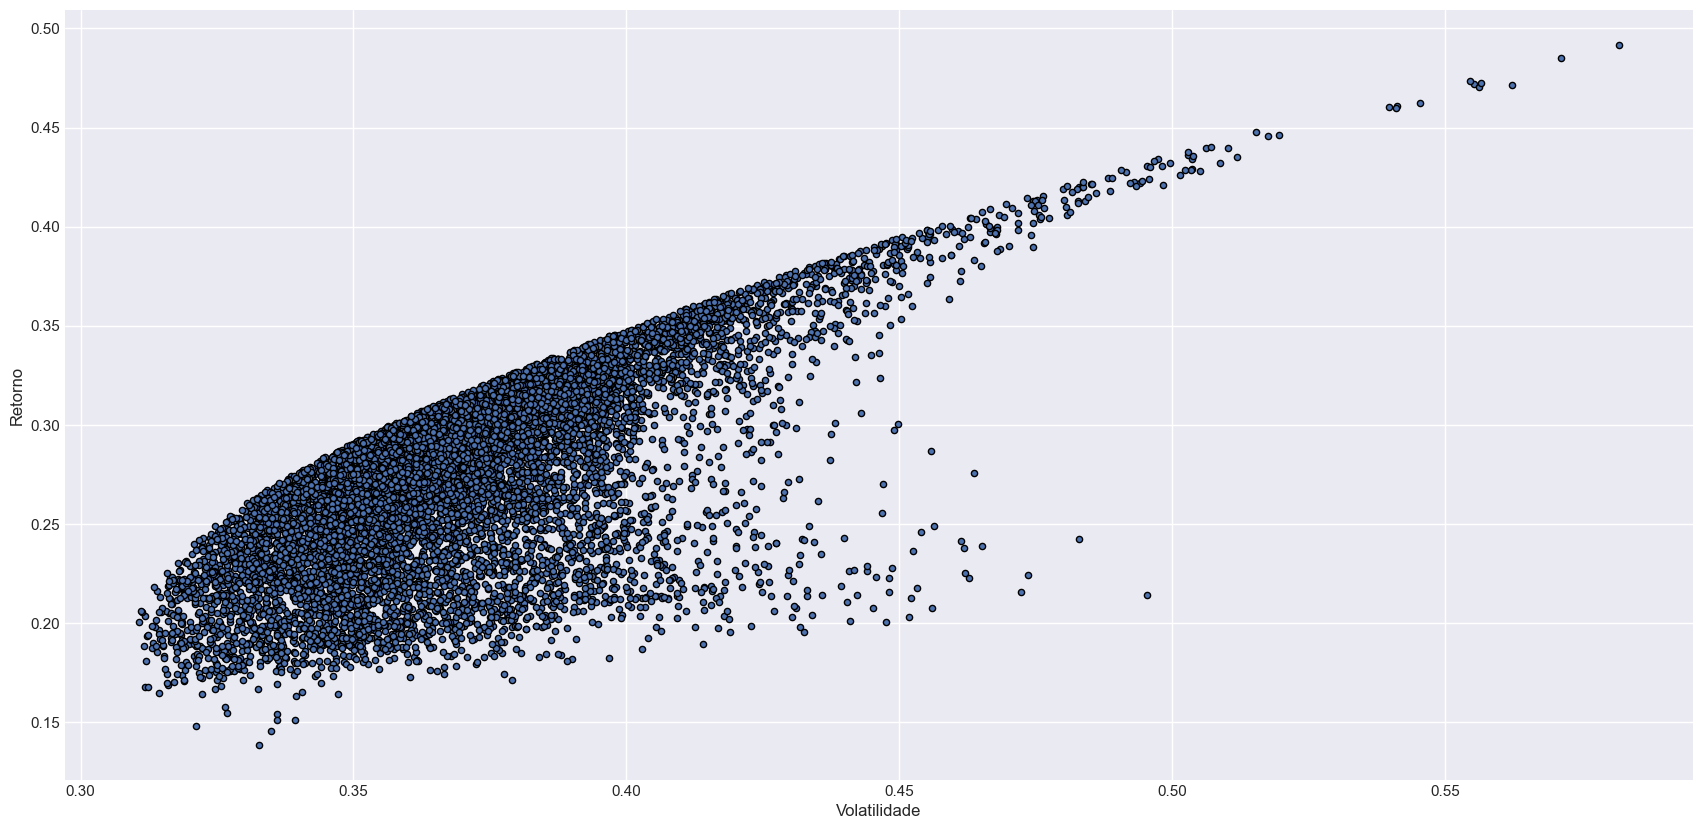

In [154]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade',
                       y='Retorno',
                       cmap='RdYlGn',
                       edgecolors='black',
                       figsize=(21, 10),
                       grid=True)

In [155]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_menor_volatilidade = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_menor_volatilidade

,Retorno,Volatilidade,sharpe_ratio
3472,0.200423,0.31073,0.645006


In [156]:
maior_sharpe = portfolios['sharpe_ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['sharpe_ratio'] == maior_sharpe]
carteira_maior_sharpe

,Retorno,Volatilidade,sharpe_ratio
8117,0.385273,0.439648,0.87632


In [157]:
maior_retorno = portfolios['Retorno'].max()
carteira_maior_retorno = portfolios.loc[portfolios['Retorno'] == maior_retorno]
carteira_maior_retorno

,Retorno,Volatilidade,sharpe_ratio
8457,0.49187,0.581803,0.845423
